# Assignment 3. Introduction to Model Training

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to @danialayati on Telegram*

### Description  
This homework consists of five questions, each aimed at one skill you are supposed to learn and get comfortable with during the course.  
1. You are supposed to perform an observational study based on **propensity score matching**, as you learned during the course.  
   
2. Briefly introduces you to the usage of sklearn library as well as the very basics of word vectorization.  
   
3. Part 3 and 4 are aimed at getting you familiarized with workflow of regression and classification tasks.  
   
4. For bonus part, you should get familiarized with the basics of PyTorch.   

### Information  
Complete the information box below.

In [66]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os.path
import zipfile
import math

## 1 Propensity score matching

In this exercise, you will apply propensity score matching that was discussed the lecture ("Observational studies"), in order to draw conclusions from an observational study. [(a reference that could help if you are interested in the concept)](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), 

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](https://www.jstor.org/stable/1806062)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.



### 1.1 A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups using plots, such as histograms, and other statistical measures, such as mean, median, variance, and standard deviation.

To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?



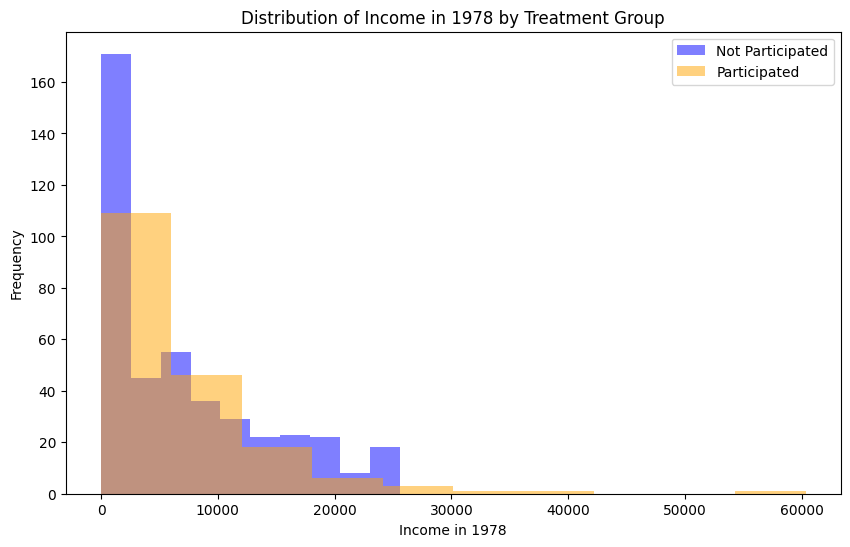

Mean of Income - Not Participated: 6984.169742307692
Mean of Income - Participated: 6349.143530270271
Median of Income - Not Participated: 4975.505
Median of Income - Participated: 4232.309
Variance of Income - Not Participated: 53080775.72732876
Variance of Income - Participated: 61561444.58720793
Standard Deviation of Income - Not Participated: 7285.65547684824
Standard Deviation of Income - Participated: 7846.110156453829


In [68]:
#Loading dataset

# File name
lalond_filename = "./lalonde.csv"

# Loading Dataframe
df = pd.read_csv(lalond_filename)

# Split the DataFrame into two groups based on the 'treat' column
group_0 = df[df['treat'] == 0]['re78']
group_1 = df[df['treat'] == 1]['re78']

# Plot histograms for each group
plt.figure(figsize=(10, 6))
plt.hist(group_0, alpha=0.5, label='Not Participated', color='blue')
plt.hist(group_1, alpha=0.5, label='Participated', color='orange')
plt.xlabel('Income in 1978')
plt.ylabel('Frequency')
plt.title('Distribution of Income in 1978 by Treatment Group')
plt.legend()
plt.show()

# Calculate and print summary statistics
print(f'Mean of Income - Not Participated: {np.mean(group_0)}')
print(f'Mean of Income - Participated: {np.mean(group_1)}')
print(f'Median of Income - Not Participated: {np.median(group_0)}')
print(f'Median of Income - Participated: {np.median(group_1)}')
print(f'Variance of Income - Not Participated: {np.var(group_0)}')
print(f'Variance of Income - Participated: {np.var(group_1)}')
print(f'Standard Deviation of Income - Not Participated: {np.std(group_0)}')
print(f'Standard Deviation of Income - Participated: {np.std(group_1)}')


At fiest glance, maybe one could say that the people who doesnt went to the program had an higher income, but this is wrong, because it can be seen that averages of two groups is almost equal, but on the other hand, those who went to the program, are more in the higher incomes than those who didn't participated in the program.

### 1.2 A closer look at the data

You're not naive, of course, so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.


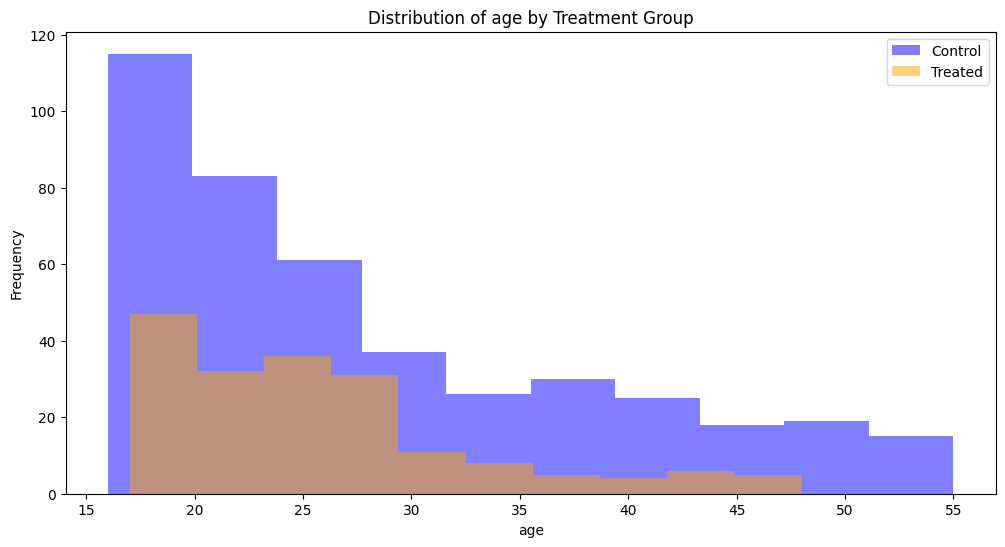

Summary Statistics for age:
Control Group:
count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
Treated Group:
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64



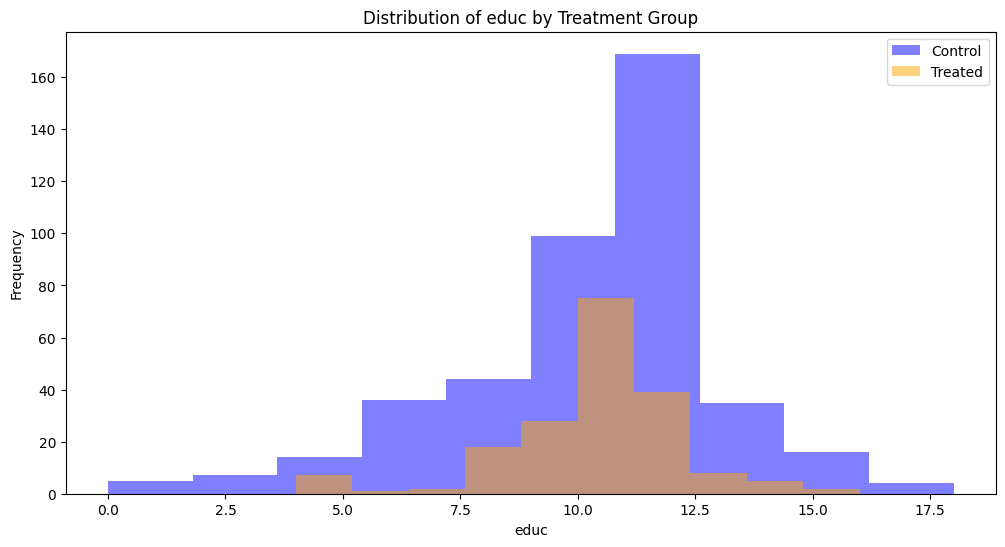

Summary Statistics for educ:
Control Group:
count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64
Treated Group:
count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64



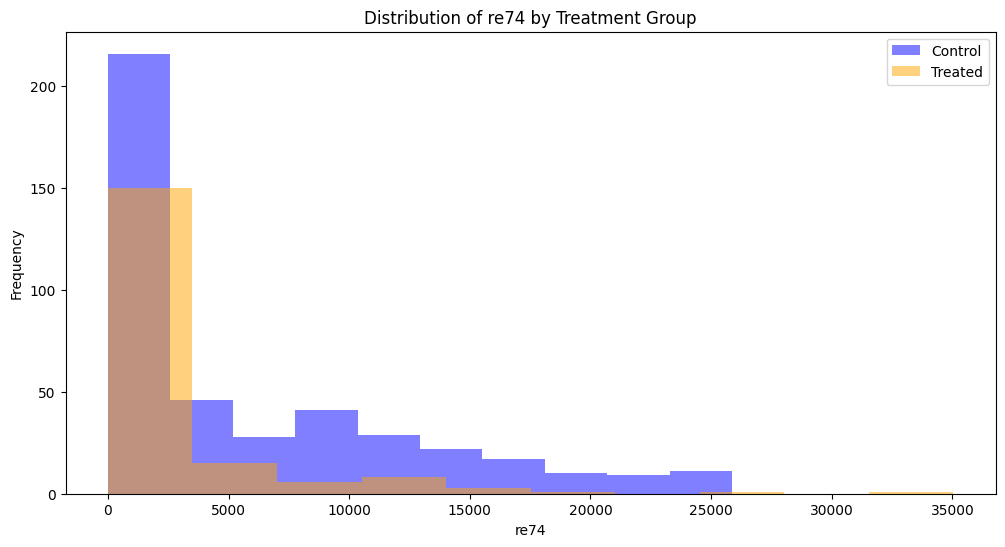

Summary Statistics for re74:
Control Group:
count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64
Treated Group:
count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64



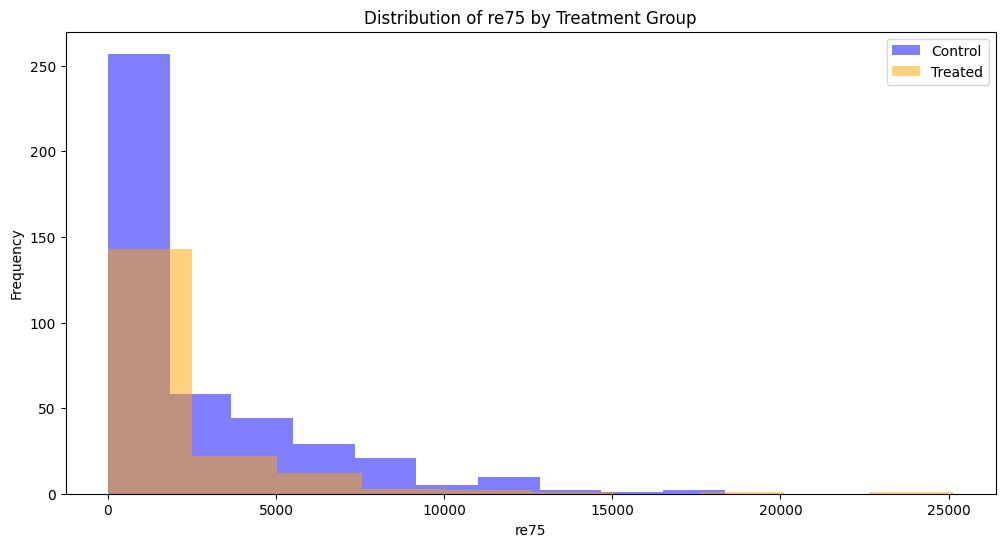

Summary Statistics for re75:
Control Group:
count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64
Treated Group:
count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64



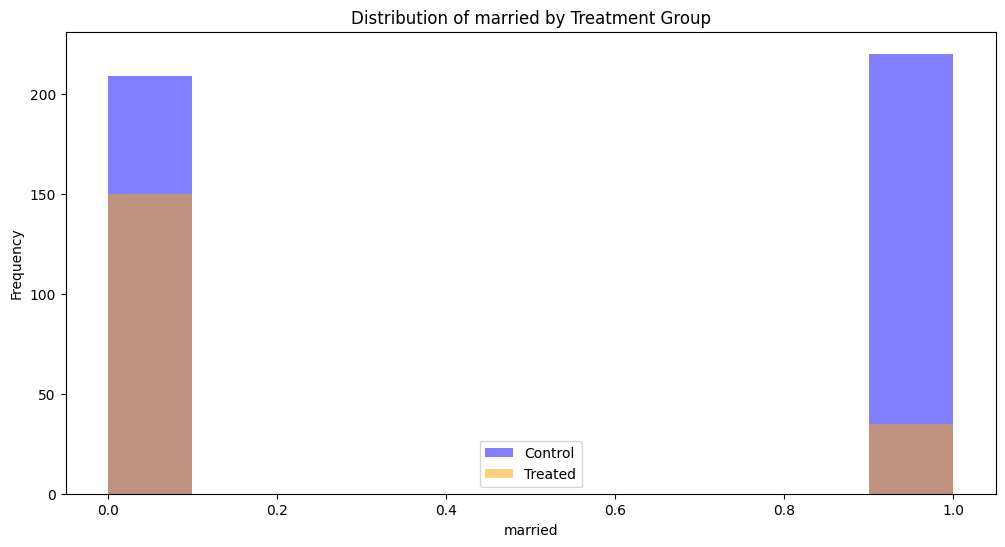

Summary Statistics for married:
Control Group:
count    429.000000
mean       0.512821
std        0.500419
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: married, dtype: float64
Treated Group:
count    185.000000
mean       0.189189
std        0.392722
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: married, dtype: float64



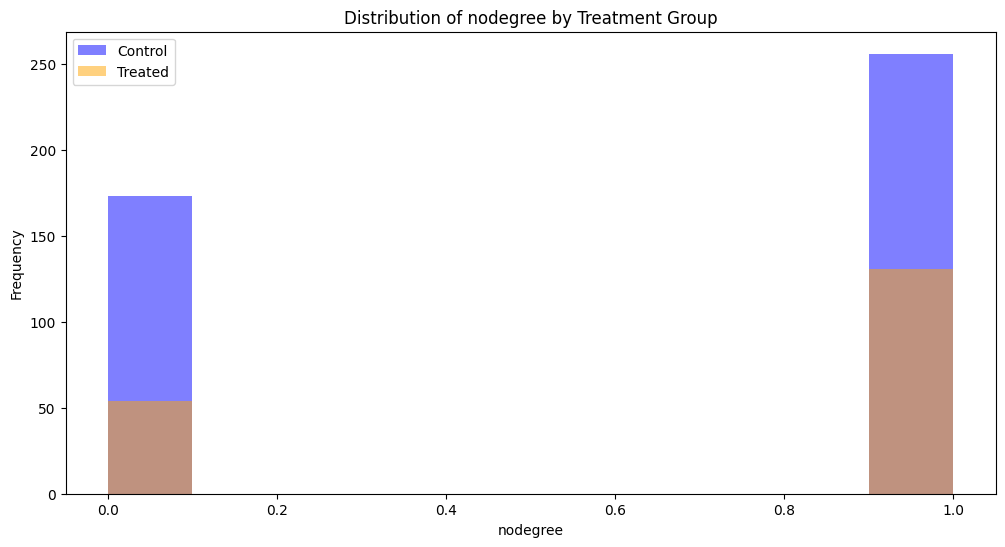

Summary Statistics for nodegree:
Control Group:
count    429.000000
mean       0.596737
std        0.491126
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64
Treated Group:
count    185.000000
mean       0.708108
std        0.455867
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64



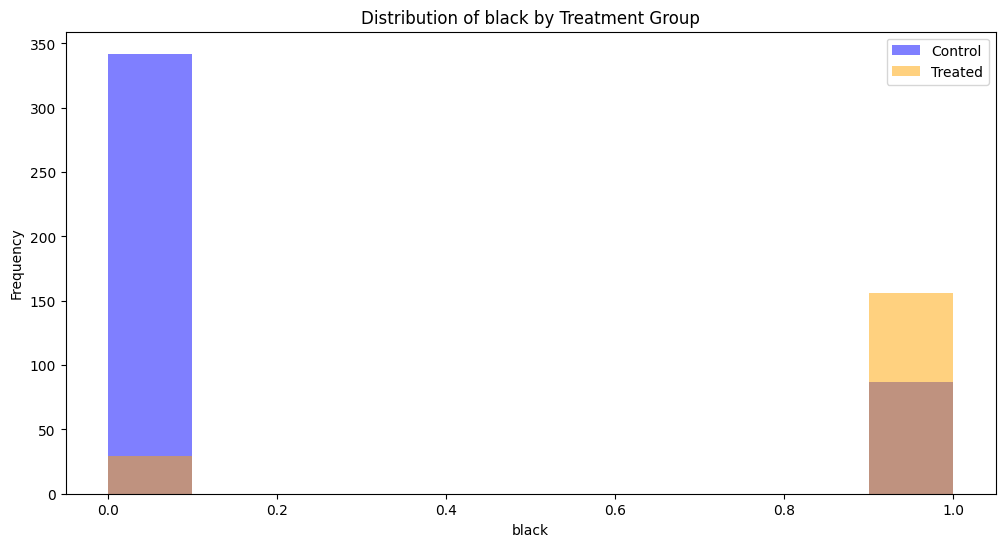

Summary Statistics for black:
Control Group:
count    429.000000
mean       0.202797
std        0.402552
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: black, dtype: float64
Treated Group:
count    185.000000
mean       0.843243
std        0.364558
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: black, dtype: float64



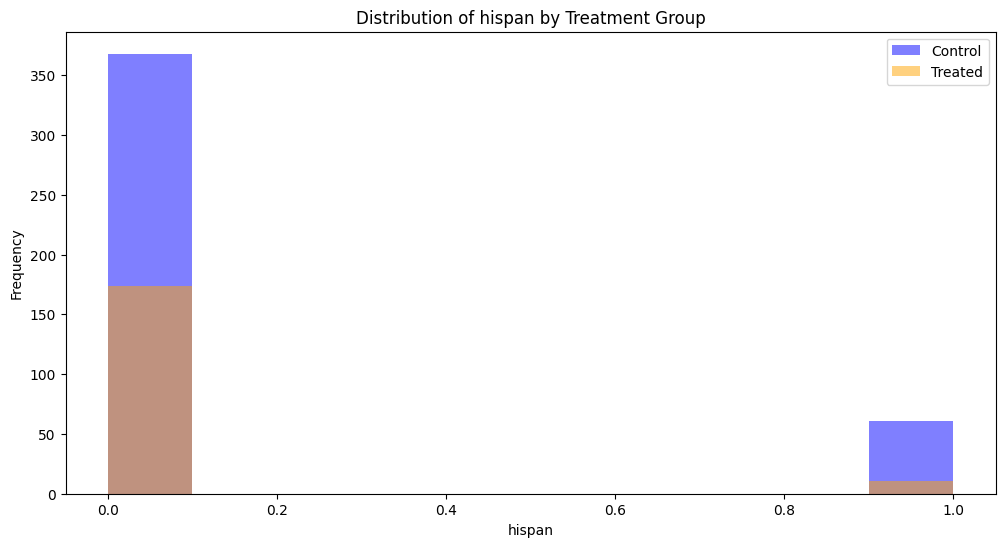

Summary Statistics for hispan:
Control Group:
count    429.000000
mean       0.142191
std        0.349654
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64
Treated Group:
count    185.000000
mean       0.059459
std        0.237124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64



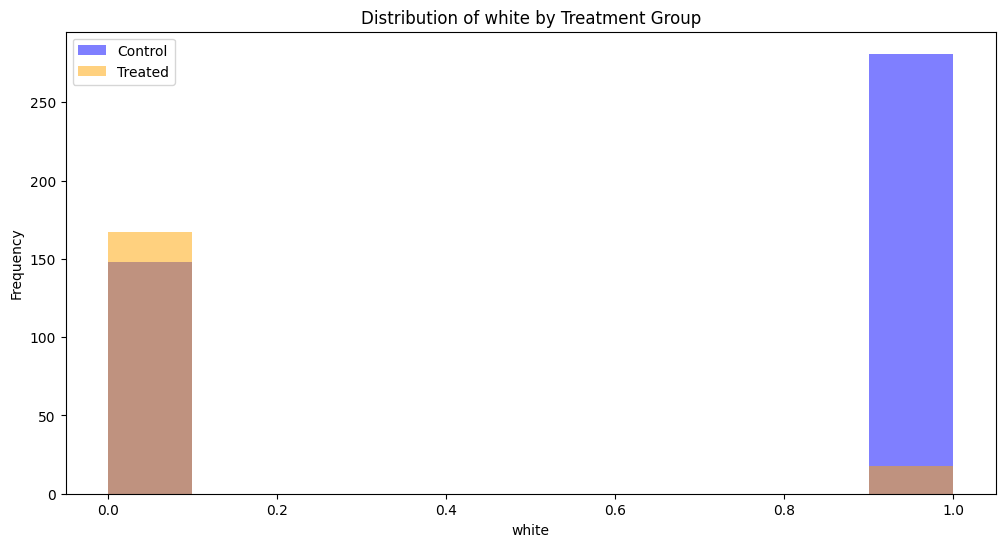

Summary Statistics for white:
Control Group:
count    429.000000
mean       0.655012
std        0.475919
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: white, dtype: float64
Treated Group:
count    185.000000
mean       0.097297
std        0.297166
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: white, dtype: float64



In [69]:
# Add 'white' feature based on two other races column value
df['white'] = (1 - df['black']) & (1 - df['hispan'])

# List of features to compare
features = ['age', 'educ', 're74', 're75', 'married', 'nodegree', 'black', 'hispan', 'white']

# Loop through each feature and compare distributions
for feature in features:
    plt.figure(figsize=(12, 6))

    # Plotting features
    plt.hist(df[df['treat'] == 0][feature], alpha=0.5, label='Control', color='blue')
    plt.hist(df[df['treat'] == 1][feature], alpha=0.5, label='Treated', color='orange')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Treatment Group')
    plt.legend()
    plt.show()

    # Print summary statistics
    control_stats = df[df['treat'] == 0][feature].describe()
    treated_stats = df[df['treat'] == 1][feature].describe()

    print(f'Summary Statistics for {feature}:')
    print(f'Control Group:\n{control_stats}')
    print(f'Treated Group:\n{treated_stats}\n')

This observations admit my explainations from the last section. Also one major thing can be seen here is that the treated group population here is very lower than the control group.

### 1.3 A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.  
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.)


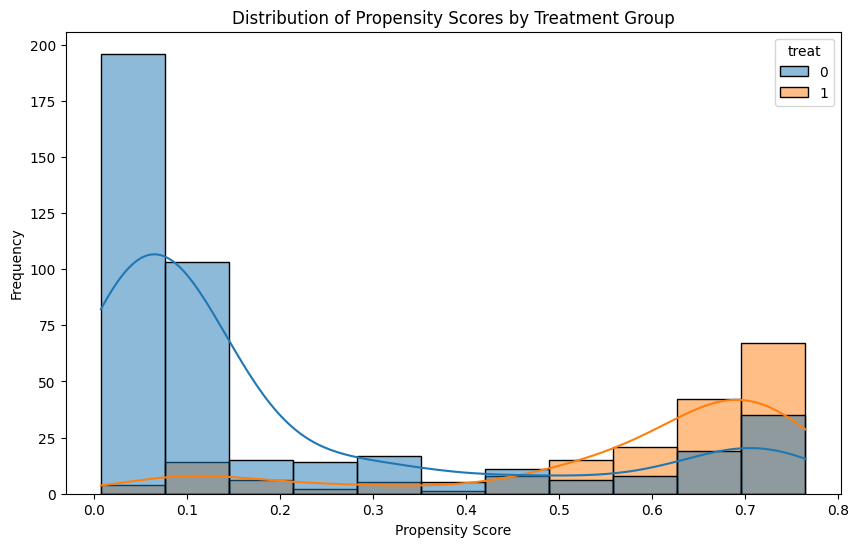

In [70]:
from sklearn.linear_model import LogisticRegression

# Prepare features and target variable
X = df[features]
y = df['treat']

# Fit logistic regression model
logistic = LogisticRegression()
logistic.fit(X, y)

# Obtain propensity scores
df['propensity_score'] = logistic.predict_proba(X)[:, 1]

# Visualize the distribution of propensity scores by treatment group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='propensity_score', hue='treat', kde=True)
plt.title('Distribution of Propensity Scores by Treatment Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.show()

### 1.4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.  
(Hint: you may explore the `networkx` package in Python for predefined matching functions)  

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.  
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.  

After matching, you have as many treated as you have control subjects.  
Compare the outcomes (`re78`) between the two groups (treated and control).  

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe?  
Are you closer to being able to draw valid conclusions now than you were before?

### Bonus
Also, You can derive a mathematical model for this section. Your optimization problem should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

You don't need to implement this model and only need to write an optimization problem and proof theoretically that your model satisfies our goal.

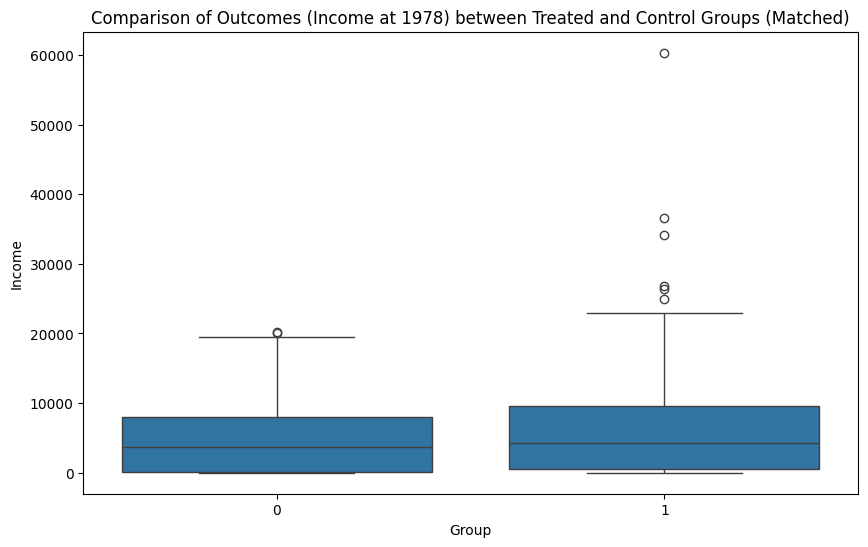

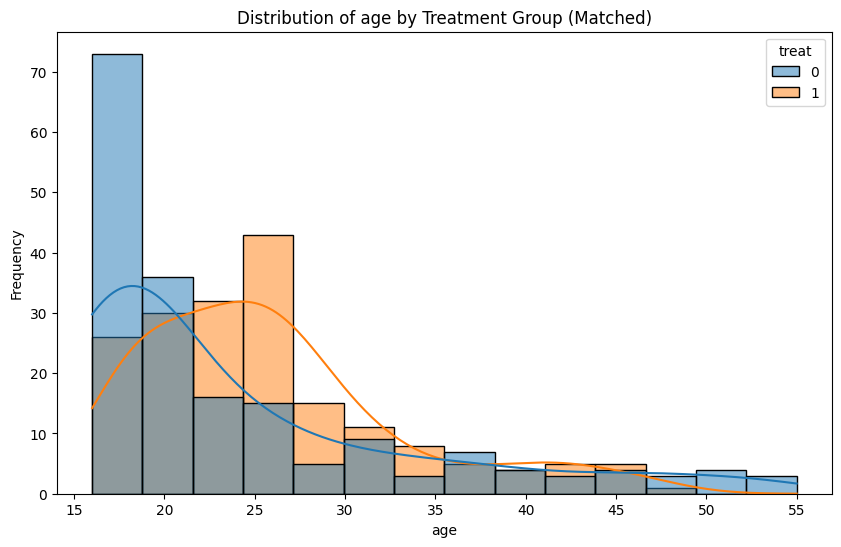

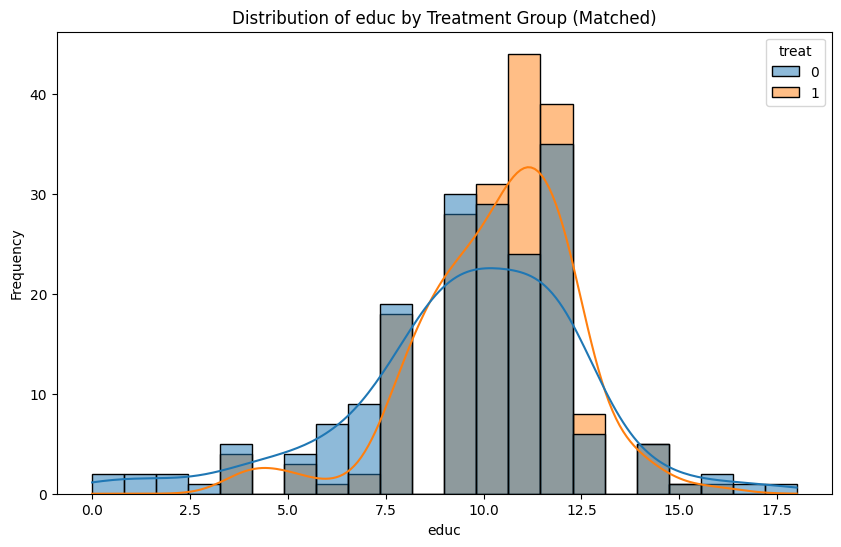

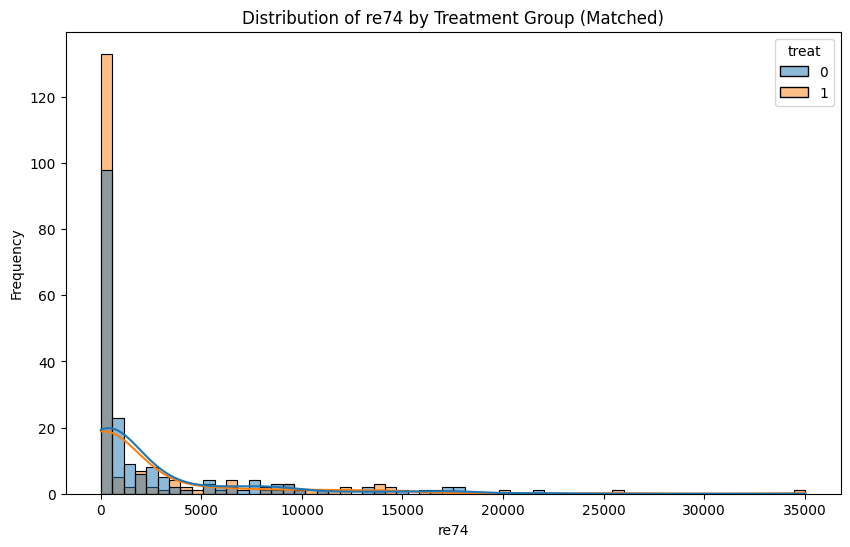

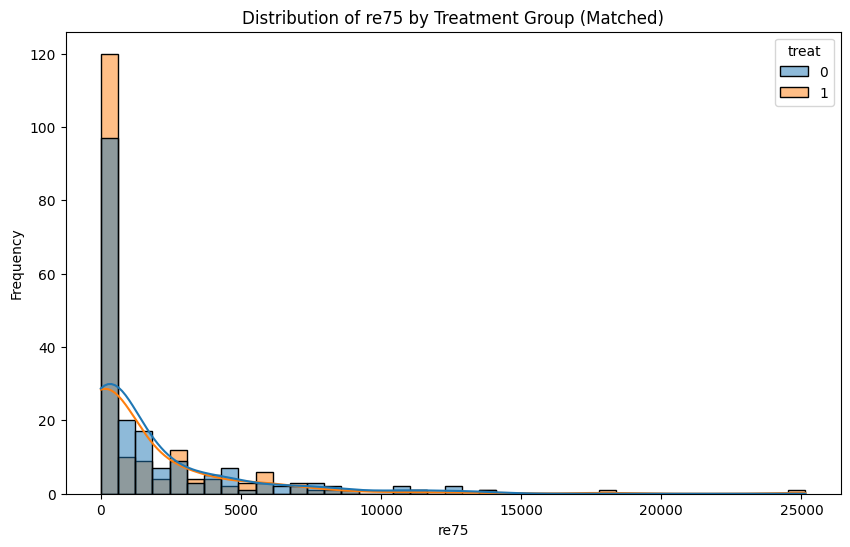

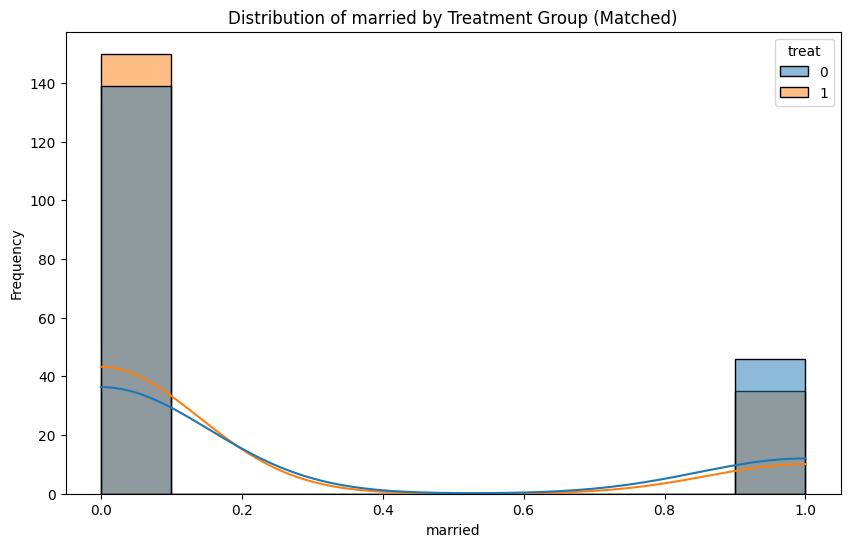

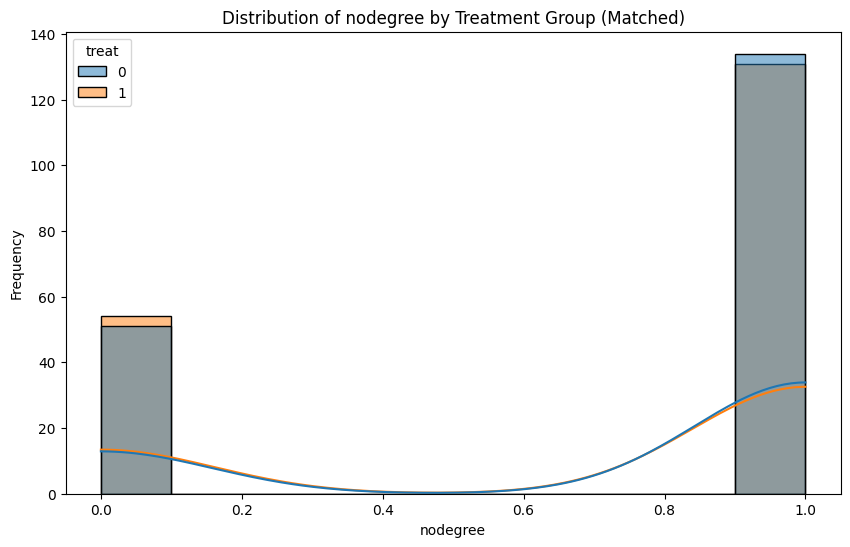

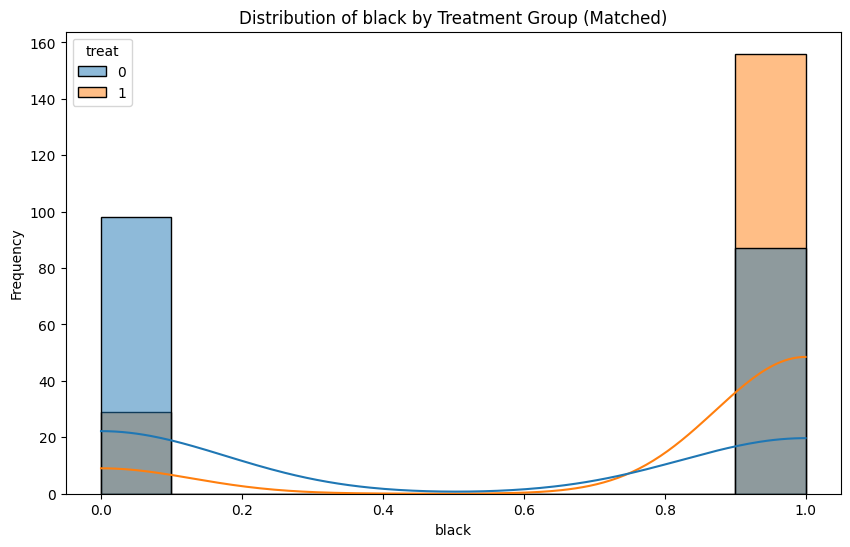

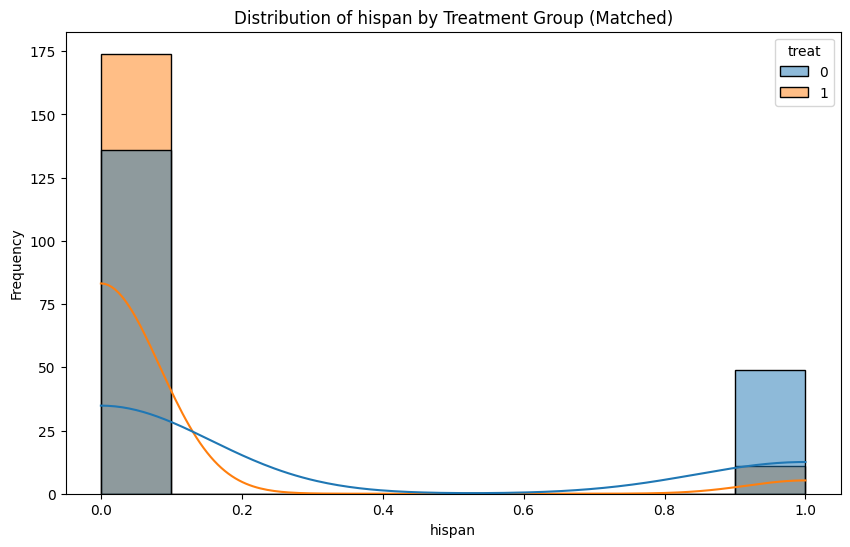

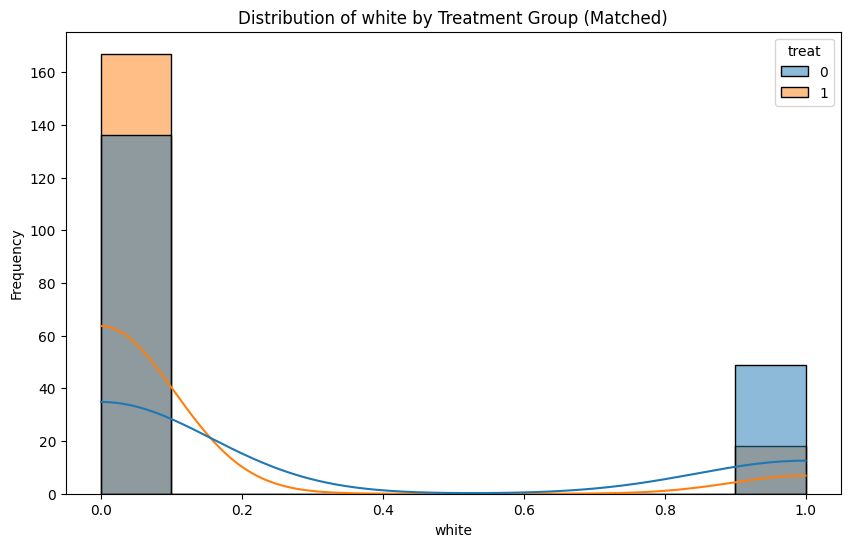

In [71]:
import networkx as nx

# Separate treated and control groups
treated_group = df[df['treat'] == 1]
control_group = df[df['treat'] == 0]

# Create a bipartite graph with edges weighted by propensity score differences
G = nx.complete_bipartite_graph(len(treated_group), len(control_group))

for i, treated_row in treated_group.iterrows():
    for j, control_row in control_group.iterrows():
        G[int(i)][int(j)]['weight'] = abs(treated_row['propensity_score'] - control_row['propensity_score'])

# Finding the minimum matching of this Graph
matching = nx.algorithms.min_weight_matching(G)
matching = [(a, b) if a <= b else (b, a) for a, b in matching]

# Extract matched pairs
matched_treated_indices = {pair[0] for pair in matching}
matched_control_indices = {pair[1] - len(treated_group) for pair in matching}

# Create a DataFrame with the matched subjects
matched_df = pd.concat([treated_group.iloc[list(matched_treated_indices)], control_group.iloc[list(matched_control_indices)]])

# Compare outcomes between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='treat', y='re78', data=matched_df)
plt.title('Comparison of Outcomes (Income at 1978) between Treated and Control Groups (Matched)')
plt.xlabel('Group')
plt.ylabel('Income')
plt.show()

# Compare feature-value distributions between the two groups for matched subjects
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=matched_df, x=feature, hue='treat', kde=True)
    plt.title(f'Distribution of {feature} by Treatment Group (Matched)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

From the matched data's it is almost clear that two groups are very similiar to each other and have almost the same average. For the treated group this average is a very tiny amount higher than the control group, and also it has a higher variance than the other group.

This Optimization model here, can be taught of as a problem which we have two arrays of variables X_i and Y_i, and the goal is to find a permutation on the elements of Y_i, so that the sum of the differences between X_i and Y_i be the minimum among all of the possible permutations.

### 1.5 Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?  
Would you say your dataset is sufficiently balanced?  
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?  

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.  
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.



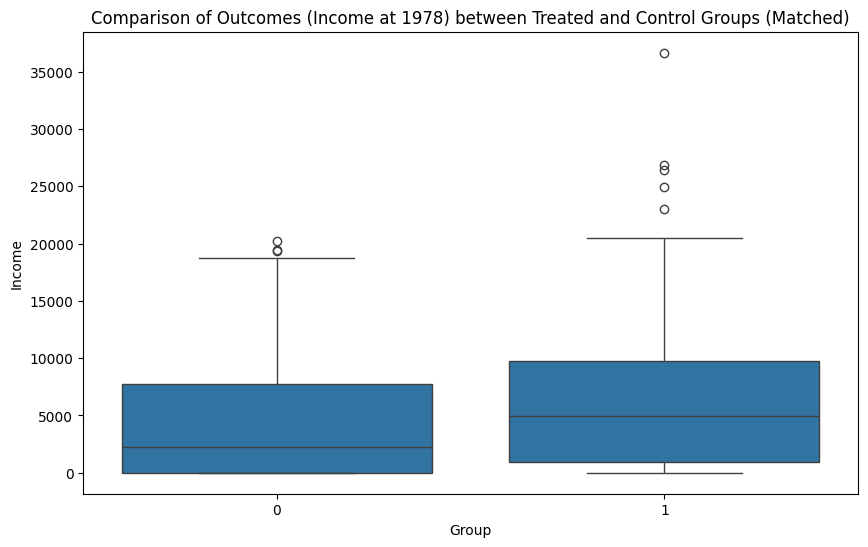

In [106]:
# Separate treated and control groups
treated_group = df[df['treat'] == 1]
control_group = df[df['treat'] == 0]

# Create a bipartite graph with edges only between data points with the same 're78' value
G = nx.Graph()

# Iterate through unique combinations of 'white', 'hispan', and 'black'
for white_value, hispan_value, black_value in treated_group[['white', 'hispan', 'black']].drop_duplicates().itertuples(index=False):

    treated_subset = treated_group[(treated_group['white'] == white_value) &
                                   (treated_group['hispan'] == hispan_value) &
                                   (treated_group['black'] == black_value)]

    control_subset = control_group[(control_group['white'] == white_value) &
                                   (control_group['hispan'] == hispan_value) &
                                   (control_group['black'] == black_value)]

    for i, treated_row in treated_subset.iterrows():
        for j, control_row in control_subset.iterrows():
            G.add_edge(int(i), int(j), weight=abs(treated_row['propensity_score'] - control_row['propensity_score']))


# Finding the minimum matching of this Graph
matching = nx.algorithms.min_weight_matching(G)
matching = [(a, b) if a <= b else (b, a) for a, b in matching]

# Extract matched pairs
matched_treated_indices = {pair[0] for pair in matching}
matched_control_indices = {pair[1] - len(treated_group) for pair in matching}

# Create a DataFrame with the matched subjects
matched_df = pd.concat([treated_group.iloc[list(matched_treated_indices)], control_group.iloc[list(matched_control_indices)]])

# Compare outcomes between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='treat', y='re78', data=matched_df)
plt.title('Comparison of Outcomes (Income at 1978) between Treated and Control Groups (Matched)')
plt.xlabel('Group')
plt.ylabel('Income')
plt.show()

### 1.6 A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


The problem with analysis from last matching was that the effect of race wasnt considered in matching incomes. Because here it can be seen that the group who participated in job training program have a higher average income than the group who didnt but in the last matched comparison this wasnt true. The reason is that the effect of race is very significant in amount of income, and when we do not pair this effect's values, then that effect get neglected from diverse data points.

## 2 Applied Machine Learning with Scikit Learn

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project!  

2.1 Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency (as you will see later in the course), is of great help when it comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


In [84]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Extract features (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)

# Split the dataset into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, newsgroups.target, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (15076, 1000)
Validation set shape: (1885, 1000)
Test set shape: (1885, 1000)


2.2 Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.


Best Parameters: {'n_estimators': 250, 'max_features': 'log2', 'max_depth': None}


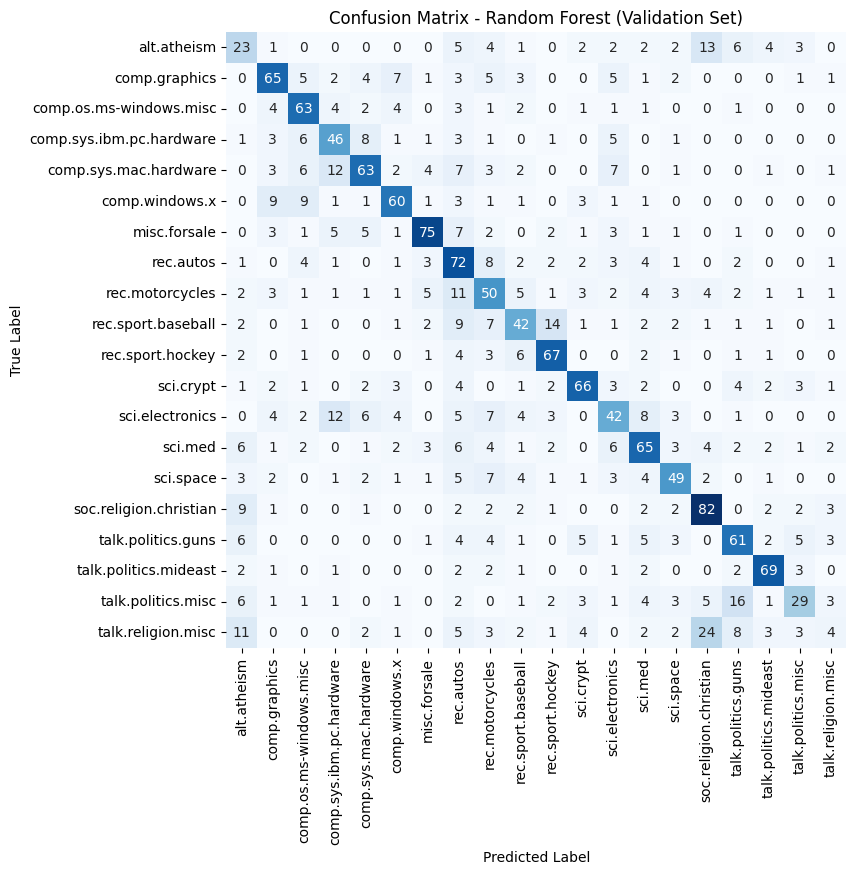

Top 20 Features and Importances:
bike: 0.007886671273158636
car: 0.007386617929447742
windows: 0.007186639424490414
just: 0.005850482817515127
space: 0.0057493247436424255
know: 0.005606523734553182
like: 0.0055966622629379835
god: 0.0055643640410685605
sale: 0.0054895565819065035
don: 0.005251028976639963
game: 0.0049026305227569756
think: 0.004732974565337471
does: 0.004695428615222194
israel: 0.004557883930041928
team: 0.004227446128038471
use: 0.004159662476640649
people: 0.004159316309442667
hockey: 0.0041546771207870425
thanks: 0.004118007432007638
clipper: 0.003938286777236617


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_features': ["log2", "sqrt"],
    'max_depth': [None, 5, 15 , 30]
}

# Perform Randomized Grid Search using Cross-Validation
randomized_search = RandomizedSearchCV(rf_classifier, param_distributions = param_grid, n_iter=10, cv=3, n_jobs=-1)
randomized_search.fit(X_train, y_train)

# Print the best parameters found by randomized search
print("Best Parameters:", randomized_search.best_params_)

# Get the best model from the randomized search
best_rf_model = randomized_search.best_estimator_

# Predictions on the validation set
y_pred = best_rf_model.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Inspect feature importances
feature_importances = best_rf_model.feature_importances_

# Sort feature importances in descending order
sorted_features = sorted(zip(vectorizer.get_feature_names_out(), feature_importances), key=lambda x: x[1], reverse=True)

# Print the top 20 features
print("Top 20 Features and Importances:")
for feature, importance in sorted_features[:20]:
    print(f"{feature}: {importance}")

From the results of analysis and also feature importances, it can be seen that the news dataset is mostly consisted of either religical news or car related news. This can be verified from the results of our Random Forest fitting too, because the prediction performed better in this related categories.

## 3 Regression (Only Numpy, Pandas, Matplotlib Allowed)

### 3.1 Reading Data and Preprocessing

In this section, we want to read data from `regression.csv` CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [168]:
#Loading dataset

# File name
regression_filename = "./regression.csv"

# Loading Dataframe
df = pd.read_csv(regression_filename)

# Extract features (X) and target variable (Y) from the DataFrame
X_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
Y_column = 'Y1'

X = df[X_columns]  # Extract features as a DataFrame
Y = df[[Y_column]]  # Extract target variable as a DataFrame

Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

Briefly explain why we need to normalize our data before starting the training.

In [169]:
# Normalize features (X)
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

# Normalize target variable (Y)
Y_mean = Y.mean()
Y_std = Y.std()
Y = (Y - Y_mean) / Y_std

Normalizing data first has the benefit of working with neat and centered random variables is easier, and also its analysis is much easier. Also predicting values of a normalized random variable is more rovust and can be generalized to other learning regimes.

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [170]:
# Add a column of 1s to represent the bias term
X['bias'] = 1

### 3.2 Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [176]:
def mean_squared_error_loss(X, Y, w):
    # Predicted values
    predictions = np.dot(X, w)

    # Mean squared error loss
    loss = np.mean((predictions - Y) ** 2)

    return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

What is the answer to this problem in terms of $X$ and $Y$?

The direct solution to the linear regression problem involves finding the weights $( \mathbf{w} )$ that minimize the mean squared error loss function $( \mathcal{L}(\mathbf{w}) )$. This can be expressed using the normal equation:

$\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}$

This answer can be computed by differentiating with respect to $w$ and calculating the solution when it is equal to zero.

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [172]:
def calculate_weights_direct(X, Y):
    # Calculate the weights using the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ Y

    return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [177]:
# Calculate the weights using the direct method
weights = calculate_weights_direct(X, Y)

# Calculate the mean squared error loss using the calculated weights
evaluated_loss = mean_squared_error_loss(X, Y, weights)

# Display the weights and the evaluated loss
print("Weights:")
print(weights)
print("\nEvaluated Loss:", evaluated_loss)

Weights:
             Y1
0 -1.832492e-02
1  2.159875e+00
2 -9.151570e-01
3 -2.504139e+00
4  7.236875e-01
5 -2.586534e-03
6  2.631706e-01
7  3.132167e-02
8  1.011886e-15

Evaluated Loss: 0.11985276526315343


### 3.3 Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.
Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

The gradient of the mean squared error loss function $\mathcal{L}(\mathbf{w})$ with respect to the weight vector $\mathbf{w}$ is given by the following expression:

$\nabla \mathcal{L}(\mathbf{w}) = \frac{2}{m} \mathbf{X}^\top (\mathbf{X} \mathbf{w} - \mathbf{Y})$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [120]:
def gradient_mean_squared_error_loss(X, Y, w):
    m = len(Y)

    # Predicted values
    predictions = np.dot(X, w)

    # Residuals
    residuals = predictions - Y

    # Compute the gradient
    gradient = (2 / m) * np.dot(X.T, residuals)

    return gradient

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [129]:
def gradient_descent(X, Y, learning_rate, num_iterations):
    m, n_plus_1 = X.shape
    w = np.random.randn(n_plus_1, 1)  # Initialize weights with random values
    loss_history = np.zeros(num_iterations)

    for iteration in range(num_iterations):
        # Calculate the gradient
        gradient = gradient_mean_squared_error_loss(X, Y, w)

        # Update weights using the gradient and learning rate
        w = w - learning_rate * gradient

        # Calculate and store the loss for monitoring
        loss_history[iteration] = mean_squared_error_loss(X, Y, w)

    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure. Discuss the effect of the learning rate and find the best value of this parameter.

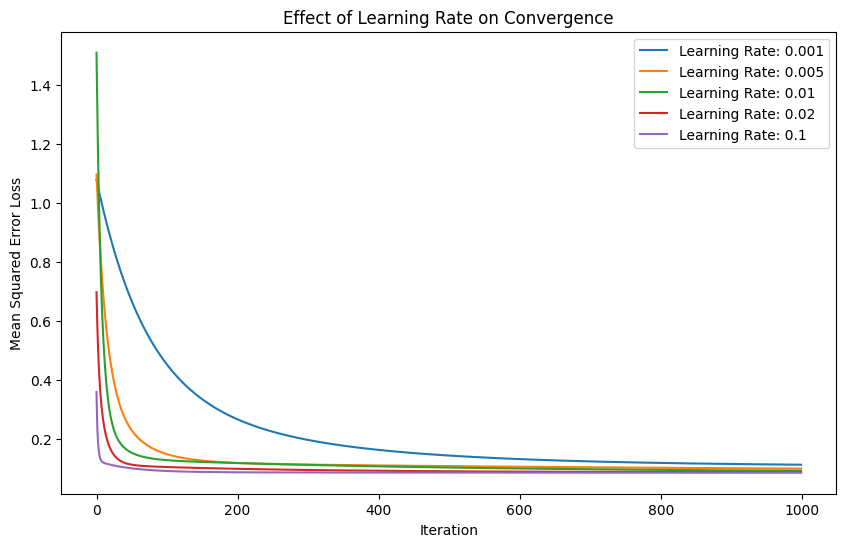

In [178]:
# Values for learning rate
learning_rates = [0.001, 0.005 , 0.01, 0.02 , 0.1]

# Number of iterations
num_iterations = 1000

# Plot the loss history for each learning rate
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    final_weights, loss_history = gradient_descent(X, Y, learning_rate, num_iterations)
    plt.plot(loss_history, label=f'Learning Rate: {learning_rate}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

### 3.4 Conclusion

Compare the answer of two different methods that we used earlier.

Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

It seems like that Gradient Descent based models, perform better on this data than the Direct Calculations models. The reason is related to the size of the datasets. In bigger datasets, numerical calculations and their related Floating-Point related issues, due to Matrix Calculations, prevent the loss of Direct Calculations to be lower than a certain amount, but this is not a serious with Gradient based methods because they dont use very heavy caculations inside their algorithms.

Also it can be seen here that larger learning rates, converge to zero loss in faster time, but the point is, if the learning rate is bigger than a treshold, it doesn't even converge at all and in this case the model doesnt provide any meaningful results. In other words, perfomance of Gradient Descent is very dependent to the adjustment of the learning rate.

## 4 Classification (Only Numpy, Pandas, Matplotlib Allowed)
### 4.1 Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `Q4-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `Q4-valid.npy` file is your validation set, and the data in `Q4-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [179]:
# Load training data
train_data = np.load('Q4-train.npy', allow_pickle=True)
X_train, Y_train = train_data[:, :-1], train_data[:, -1]

# Load validation data
val_data = np.load('Q4-valid.npy', allow_pickle=True)
X_val, Y_val = val_data[:, :-1], val_data[:, -1]

# Load test data
test_data = np.load('Q4-test.npy', allow_pickle=True)
X_test, Y_test = test_data[:, :-1], test_data[:, -1]

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [181]:
def create_poly_matrix(X, k):
    m = len(X)
    poly_matrix = np.ones((m, k + 1))

    for i in range(1, k + 1):
        poly_matrix[:, i] = np.squeeze(np.asarray(X)) ** i

    return poly_matrix

### 4.2 Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Part 3** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [192]:
def mean_squared_error_loss_2(X, Y, w):
    # Predicted values
    predictions = np.dot(X, w)

    # Mean squared error loss
    Y_reshaped = Y.reshape(-1, 1)
    loss = np.mean((predictions - Y_reshaped) ** 2)

    return loss

In [220]:
def gradient_descent_2(X, Y, learning_rate, num_iterations):
    m, n_plus_1 = X.shape
    w = np.random.randn(n_plus_1, 1)  # Initialize weights with random values
    loss_history = np.zeros(num_iterations)

    for iteration in range(num_iterations):
    
        # Calculate the gradient
        gradient = gradient_mean_squared_error_loss(X, Y, w)

        # Save the loss value related to before iteration loss
        temp1 = mean_squared_error_loss(X, Y, w)
        temp2 = mean_squared_error_loss(X, Y, w - learning_rate * gradient)

        # Update weights using the gradient and learning rate
        if temp2 <= temp1:
            w = w - learning_rate * gradient
        else:
            break

        # Calculate and store the loss for monitoring
        loss_history[iteration] = mean_squared_error_loss_2(X, Y, w)

    return w, loss_history

In [215]:
def train_polynomial_model(X_train, Y_train, X_val, Y_val, k, method='gradient_descent', learning_rate=0.005, num_iterations=1000):
    # Create polynomial matrix for training and validation sets
    X_train_poly = create_poly_matrix(X_train, k)
    X_val_poly = create_poly_matrix(X_val, k)

    # Train the model
    if method == 'gradient_descent':
        w, train_loss_history = gradient_descent_2(X_train_poly, Y_train, learning_rate, num_iterations)
    elif method == 'direct_calculation':
        w = calculate_weights_direct(X_train_poly, Y_train)
        train_loss_history = mean_squared_error_loss_2(X_train_poly, Y_train, w)
    else:
        raise ValueError("Invalid method. Use 'gradient_descent' or 'direct_calculation'.")

    # Calculate losses on training and validation sets
    train_loss = mean_squared_error_loss_2(X_train_poly, Y_train, w)
    val_loss = mean_squared_error_loss_2(X_val_poly, Y_val, w)

    return train_loss, val_loss, w

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot. Discuss about the effect of $k$.

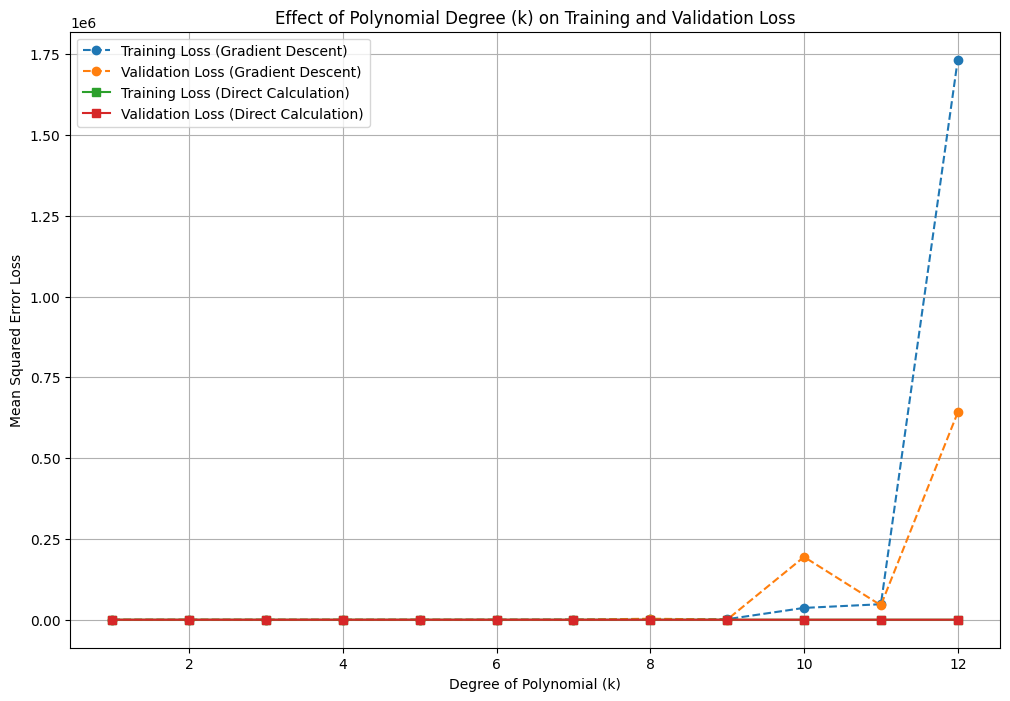

In [221]:
# Values for k
k_values = list(range(1, 13))

# Lists to store losses for gradient descent and direct calculation
train_losses_gd = []
val_losses_gd = []
train_losses_dc = []
val_losses_dc = []

# Train models for different values of k using gradient descent and direct calculation
for k_value in k_values:
    # Gradient Descent
    train_loss_gd, val_loss_gd, _ = train_polynomial_model(X_train, Y_train, X_val, Y_val, k_value, method='gradient_descent')
    train_losses_gd.append(train_loss_gd)
    val_losses_gd.append(val_loss_gd)

    # Direct Calculation
    train_loss_dc, val_loss_dc, _ = train_polynomial_model(X_train, Y_train, X_val, Y_val, k_value, method='direct_calculation')
    train_losses_dc.append(train_loss_dc)
    val_losses_dc.append(val_loss_dc)

# Plot the losses as a function of k for both methods
plt.figure(figsize=(12, 8))

# Gradient Descent
plt.plot(k_values, train_losses_gd, label='Training Loss (Gradient Descent)', linestyle='--', marker='o')
plt.plot(k_values, val_losses_gd, label='Validation Loss (Gradient Descent)', linestyle='--', marker='o')

# Direct Calculation
plt.plot(k_values, train_losses_dc, label='Training Loss (Direct Calculation)', linestyle='-', marker='s')
plt.plot(k_values, val_losses_dc, label='Validation Loss (Direct Calculation)', linestyle='-', marker='s')

plt.title('Effect of Polynomial Degree (k) on Training and Validation Loss')
plt.xlabel('Degree of Polynomial (k)')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.grid(True)
plt.show()

### 4.3 Evaluating Model

In the cell below find the loss of your best model on the test set. Why we need test set?

It seems that in here, test models with using Direct Calculation, perform better than the models using Gradient Descent, but the fact is, it is obvious that both models perform very well on lower values of k and reach zero loss.

## Bonus. CAT or PERSON: Data Sources and Introduction to Pytorch
The purpose of this exercise is two-fold. First, you create an image dataset inheriting from `torch.utils.data.Dataset` by collecting images from two webpages providing AI-generated images to the public. This helps you to understand how data needed for a data science task might come from various sources other than locally stored images, structured files (like CSV), relational databases, etc. Also, people sometimes need to create their custom dataset for their research purposes. In the second part, you will train a neural network on the data using the pytorch framework.


### 5.1 Installing Pytorch

Your job for this section is to install pytorch and the torchvision library. You may normally need torchvision in this exercise when handling images for converting images to torch tensors. For the sake of practicing, it might be good to try installing the libraries directly from your notebook. However, you can also do it from your system shell. Whatever you do, please share your work and the installation success message below. If executing shell commands for installation please share the screenshot of your terminal.

### 5.2 Dataset
Take a look at [this interesting webpage](https://thisxdoesnotexist.com/) which shares AI-generated images and have some fun first! Well, we want to collect a dataset consisting of 50 images from [this url](https://thispersondoesnotexist.com/image) created by Phillip Wang and 50 images from [this one](https://thiscatdoesnotexist.com) created by Ryan Hoover. 
For creating the dataset you must inherit from `torch.utils.data.Dataset` and name your custom dataset class as `collected_2class_Dataset`

The `__init__()`, `__len__()` and `__getitem__()` methods of the class must be rewritten by you properly. 

The dataset must be designed in a way that by instantiation of the class, the data collection starts until all the samples are gathered. Your `__getitem__()` should also be coded in a way that `__getitem__(idx)` returns the data sample with the index `idx`. More precisely if your instance of `collected_2class_Dataset` is named `DS` and if:

`img, label = DS.__getitem__(someIndex)`, Then:

* `img` should be a torch tensor of size [1, 784] with data type float. The values must represent the scaled (to [0,1]) pixel values of the grayscale version of the images after being resized to 28x28.  
* `label` should be a torch tensor of a single element with data type long taking the value of 0 if the image is for a person and 1 if the image is related to a cat.

You might need to use additional packages like [Pillow](https://pypi.org/project/Pillow/) for image operations. Also, for requesting images from the websites you can follow different approaches. The simplest one might be running proper curl commands as shell commands from inside your python code. Use the following URLs for each resource to GET the images:
* https://thispersondoesnotexist.com/image
* https://thiscatdoesnotexist.com

Write code for your Dataset class definition and also any auxiliary functions if applicable. Please instantiate your class at the end of this code section.

### 5.3 Dataloader
Using `torch.utils.data.random_split` split your dataset to train/test with the proportion of 70/30. Based on `torch.utils.data.DataLoader` create a DataLoader for train data and one for test data. The choice of the batch size is up to you, but try to use rational values.

### 5.4 Training a Neural Network Classifier
Inheriting from `torch.nn.Module` create a neural network for classifying the input images to person/cat. Use 2 hidden layers. Employ relu as the non-linearity (activation function) for the both hidden layers and sigmoid for the output. The choice of the number of nodes in the hidden layers is up to you. Train your network with the `torch.nn.CrossEntropyLoss` loss as objective function and use `torch.optim.Adam` as optimizer. Use 10 epochs of learning. Report the accuracy of classification at the end of each learning epoch by printing the values. 

### 5.5 Testing the Trained Model
Examine the accuracy of your trained model on the test data prepared in section 3-5 and report the result.

### 5.6 Is it Really Difficult to Distinguish Cats from Humans? 
Can you propose a rather simple rule-based system for doing this classification task? No code is needed for this part, just explain your ideas.